In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import scipy.stats as stat
import random
import diff_classifier.aws as aws
import diff_classifier.msd as msd
from diff_classifier.msd import binning, precision_weight, precision_averaging, plot_all_experiments
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import scipy.stats as stats

In [2]:
folder = 'Gel_Studies/08_14_18_gel_validation'
bucket = 'ccurtis.data'
experiment = '100nm' #Used for naming purposes. Should exclude XY and well information

vids = 5
to_track = []
wells = 1
frames = 651
fps = 100.02

for num in range(1, vids+1):
    to_track.append('{}_XY{}'.format(experiment, '%02d' % num)) #As per usual, use for loops to include all experiments

In [3]:
to_track

['100nm_XY01', '100nm_XY02', '100nm_XY03', '100nm_XY04', '100nm_XY05']

In [5]:
slices, bins, well_names = binning(to_track, prefix=experiment)
geomean = {}
gSEM = {}
for sample_name in to_track:
    aws.download_s3('{}/geomean_{}.csv'.format(folder, sample_name), 'geomean_{}.csv'.format(sample_name), bucket_name=bucket)
    aws.download_s3('{}/geoSEM_{}.csv'.format(folder, sample_name), 'geoSEM_{}.csv'.format(sample_name), bucket_name=bucket)
    geomean[sample_name] = np.genfromtxt('geomean_{}.csv'.format(sample_name))
    gSEM[sample_name] = np.genfromtxt('geoSEM_{}.csv'.format(sample_name))
    
    #aws.download_s3('{}/msd_{}.csv'.format(folder, sample_name), 'msd_{}.csv'.format(sample_name), bucket_name=bucket)
    #geomean[sample_name], gSEM[sample_name] = msd.geomean_msdisp(sample_name, umppx=0.07, remote_folder=folder, bucket=bucket)
    print('Done with {}'.format(sample_name))

Done with 100nm_XY01
Done with 100nm_XY02
Done with 100nm_XY03
Done with 100nm_XY04
Done with 100nm_XY05


In [ ]:
gSEM

In [7]:
geo_slices = {}
gSEM_slices = {}

w_slices = {}
wo_slices = {}
w_holder = {}
wh = {}
gh = {}

# for key in bins:
#     print(key)
#     wo_slices[key], wh[key] = precision_weight(bins[key], gSEM)
#     geo_slices[key], gSEM_slices[key], w_holder[key], gh[key] = precision_averaging(bins[key], geomean, gSEM, wo_slices[key],
#                                                             bucket=bucket, folder=folder, experiment=key) 

# for key in geo_slices:
#     geo_slices[key][geo_slices[key]==0.0] = np.nan
#     gSEM_slices[key][gSEM_slices[key]==0.0] = np.nan
    
#     geo_slices[key] = ma.masked_invalid(geo_slices[key])
#     gSEM_slices[key] = ma.masked_invalid(gSEM_slices[key])
    
weights, wh1 = precision_weight(to_track, gSEM)
precisiondata = precision_averaging(to_track, geomean, gSEM, weights, bucket=bucket, folder=folder, experiment=experiment)

/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:566: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = 1/(geo_stder[sample]*geo_stder[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:613: RuntimeWarning: divide by zero encountered in true_divide
  w_holder[video_counter, :] = (1/(geo_stder[sample]*geo_stder[sample])
/home/ubuntu/source/diff-classifier/diff_classifier/msd.py:617: RuntimeWarning: divide by zero encountered in true_divide
  gstder_holder[video_counter, :] = 1/(geo_stder[sample]*geo_stder[sample]


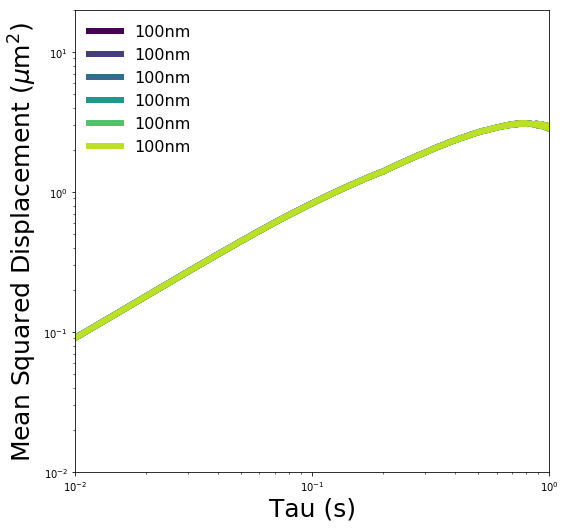

In [9]:
to_plot_f = [experiment, experiment, experiment, experiment, experiment, experiment]
plot_all_experiments(to_plot_f, bucket=bucket, folder=folder, yrange=(10**-2, 10*2))

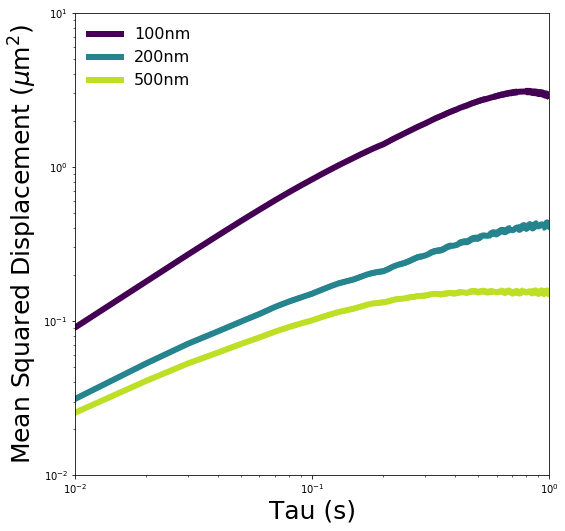

In [12]:
to_plot_f = ['100nm', '200nm', '500nm']
plot_all_experiments(to_plot_f, bucket=bucket, folder=folder, yrange=(10**-2, 10))

In [ ]:
to_plot = []
for key in geoM2xy:
    to_plot.append(key)
    
plot_all_experiments(to_plot, bucket=bucket, folder=folder)

In [ ]:
to_plot = []
for key in geo_slices:
    to_plot.append(key)
    
plot_all_experiments(to_plot, bucket=bucket, folder=folder)

In [ ]:
test = np.array([-5, -4, -3, -2, -1])
test = np.array([0.0001, 0.002, 0.03, 0.000005])
test2 = ma.log(test)
test2

In [ ]:
stats.sem(test)

In [ ]:
gSEM

In [ ]:
geoM2xy